In [1]:
import numpy as np
import timeit
from models import KNN, DecisionTree, preprocessing, RandomForest
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, confusion_matrices, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv, plot_cluster_by_model
from typing import get_args
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# load data

In [2]:
# Load data
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


# Data preprocessing

In [4]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [5]:
X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)

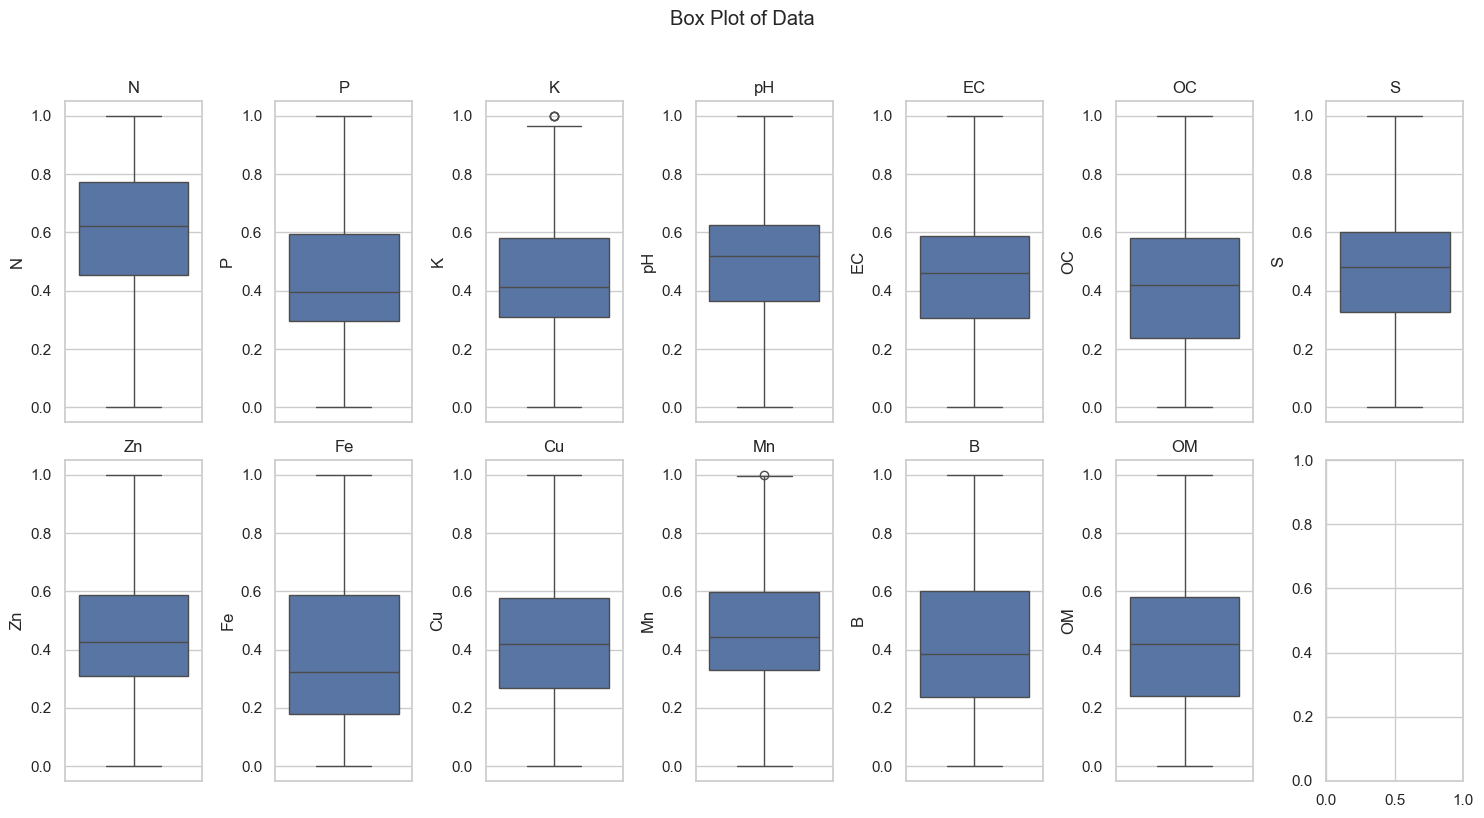

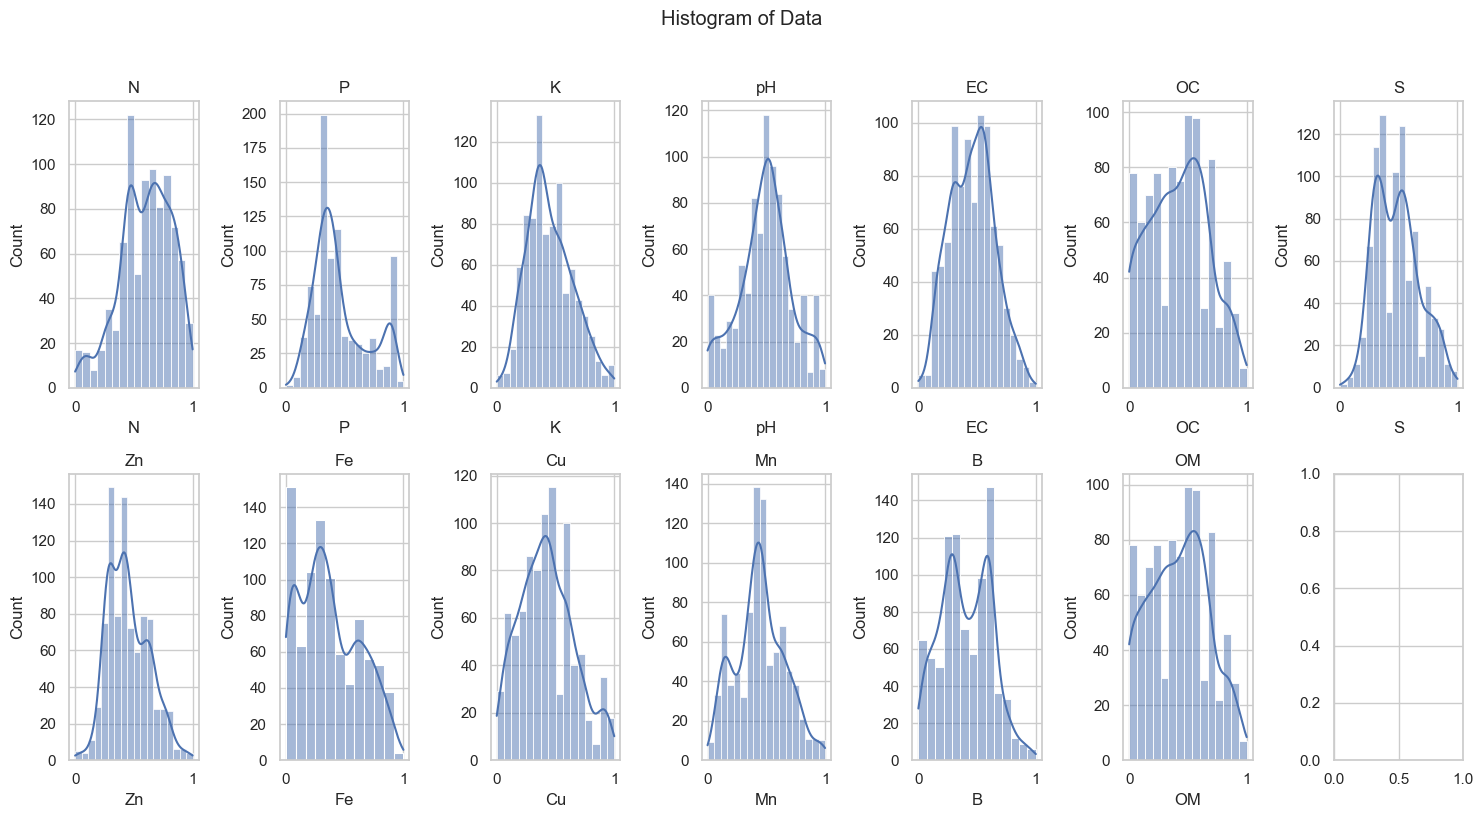

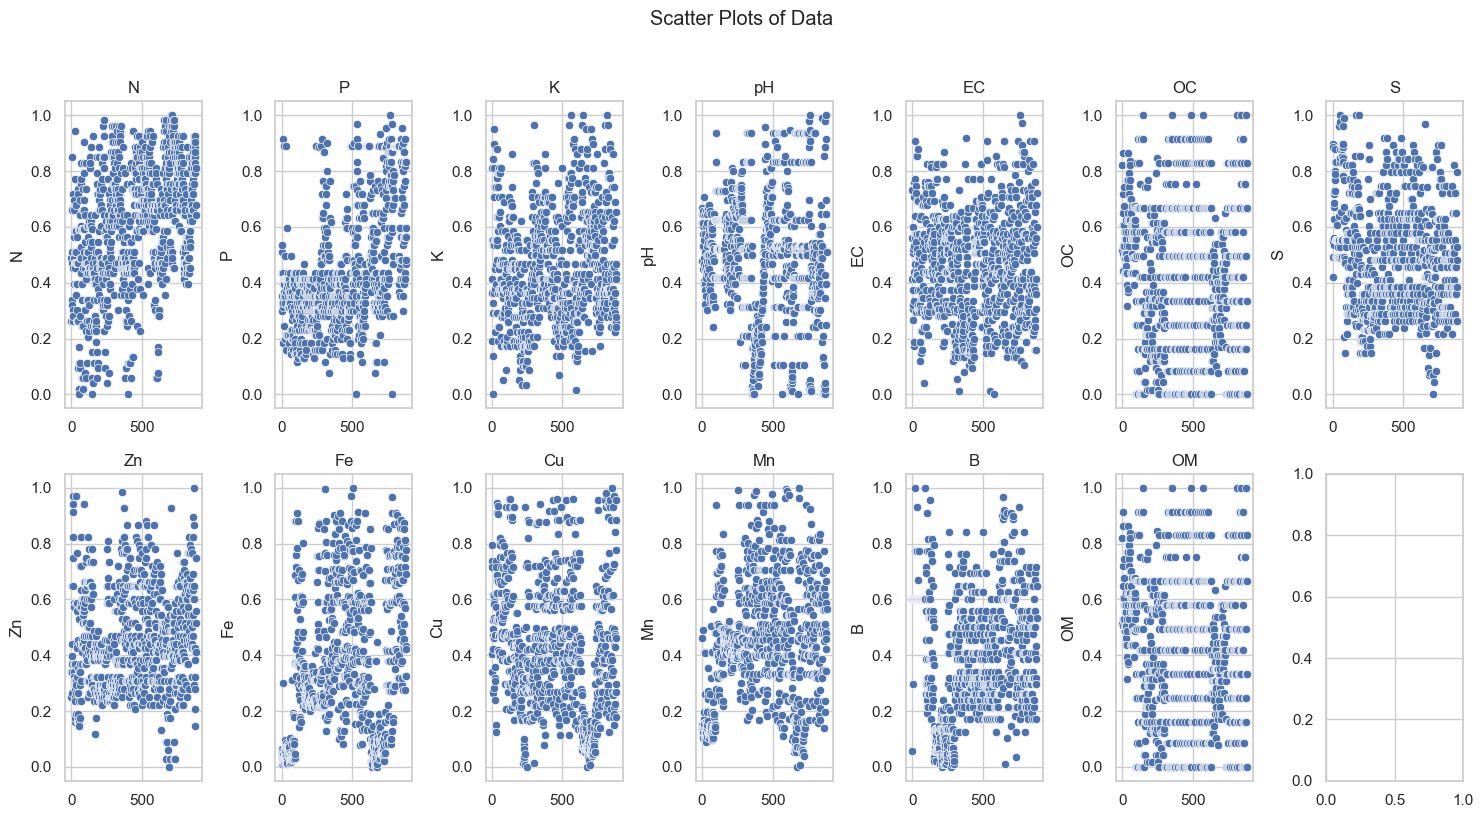

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# KNN

In [10]:
for strategy in strategies:
    knn = KNN(k=10, strategy=strategy)
    knn.fit(X_train, Y_train)
    print(f'Accuracy for {strategy} strategy: {knn.score(X_test, Y_test, metric="accuracy")}')

Accuracy for euclidean strategy: 0.7727272727272727
Accuracy for manhattan strategy: 0.7897727272727273
Accuracy for minkowski strategy: 0.7727272727272727
Accuracy for cosine strategy: 0.7556818181818182
Accuracy for hamming strategy: 0.6818181818181818


# Decision tree

In [11]:
tree = DecisionTree()
tree.fit(X_train, Y_train)
print(f'Accuracy for decision tree: {tree.score(X_test, Y_test, metric="accuracy")}')

Accuracy for decision tree: 0.8465909090909091


# Random forest

In [12]:
random_forest = RandomForest(n_trees=10)
random_forest.fit(X, Y)
print(f'Accuracy for random forest: {random_forest.score(X_test, Y_test, metric="accuracy")}')

Accuracy for random forest: 0.9772727272727273


# Search for best parameters using grid search cv

In [13]:
averages = list(get_args(Average))
averages.remove('binary') # out dataset has more than 2 classes, so we can't use binary
averages

['macro', 'micro', 'weighted']

<h4>Knn</h4>

In [14]:
parameters = {'k': [1, 3, 5, 7], 'strategy': strategies.keys()}
results, best_results = grid_search_cv(KNN, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'k': 5, 'strategy': 'euclidean'},
 'best_score': 0.621965911347751}


,model,accuracy,precision,recall,f1-score,specificity
0,"KNN(strategy=euclidean_distance, k=1)",0.750355,0.574413,0.564315,0.560666,0.848100
1,"KNN(strategy=manhattan_distance, k=1)",0.709220,0.610499,0.561836,0.555537,0.823563
2,"KNN(strategy=minkowski_distance, k=1)",0.756028,0.575053,0.560064,0.563181,0.850335
3,"KNN(strategy=cosine_distance, k=1)",0.713475,0.571447,0.583334,0.569625,0.825811
4,"KNN(strategy=hamming_distance, k=1)",0.592908,0.479055,0.482202,0.478173,0.751454
5,"KNN(strategy=euclidean_distance, k=3)",0.788652,0.634016,0.597551,0.593410,0.868134
6,"KNN(strategy=manhattan_distance, k=3)",0.770213,0.640783,0.575314,0.584732,0.857044
7,"KNN(strategy=minkowski_distance, k=3)",0.781560,0.613126,0.563338,0.566278,0.865417
8,"KNN(strategy=cosine_distance, k=3)",0.748936,0.571030,0.542509,0.545063,0.841476
9,"KNN(strategy=hamming_distance, k=3)",0.570213,0.437792,0.413899,0.415382,0.727977


<h4>Decision tree</h4>

In [15]:
parameters = {'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(DecisionTree, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 100}, 'best_score': 0.7601215967754887}


,model,accuracy,precision,recall,f1-score,specificity
0,DecisionTree(max_depth=10),0.873759,0.756677,0.708177,0.726553,0.925202
1,DecisionTree(max_depth=50),0.872340,0.749908,0.740896,0.743655,0.924046
2,DecisionTree(max_depth=100),0.875177,0.776310,0.759263,0.760122,0.926342
3,DecisionTree(max_depth=150),0.876596,0.736137,0.748890,0.737580,0.930382
4,DecisionTree(max_depth=200),0.879433,0.744106,0.737763,0.736951,0.929909


<h4>Random forest</h4>

In [16]:
parameters = {'n_trees': [2, 5, 10, 15], 'max_depth': [10, 50, 100, 150, 200]}
results, best_results = grid_search_cv(RandomForest, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 150, 'n_trees': 15},
 'best_score': 0.9299404343215606}


,model,accuracy,precision,recall,f1-score,specificity
0,"RandomForest(n_trees=2, max_depth=10)",0.954610,0.956596,0.870149,0.895828,0.971303
1,"RandomForest(n_trees=2, max_depth=50)",0.947518,0.922397,0.836077,0.860797,0.968074
2,"RandomForest(n_trees=2, max_depth=100)",0.947518,0.940273,0.841350,0.860990,0.966713
3,"RandomForest(n_trees=2, max_depth=150)",0.944681,0.921321,0.860840,0.871854,0.965837
4,"RandomForest(n_trees=2, max_depth=200)",0.946099,0.920800,0.830655,0.862294,0.966394
5,"RandomForest(n_trees=5, max_depth=10)",0.947518,0.920356,0.863706,0.886995,0.967876
6,"RandomForest(n_trees=5, max_depth=50)",0.954610,0.908856,0.840592,0.863963,0.972063
7,"RandomForest(n_trees=5, max_depth=100)",0.957447,0.938968,0.867380,0.891714,0.974039
8,"RandomForest(n_trees=5, max_depth=150)",0.948936,0.918277,0.875708,0.893654,0.967861
9,"RandomForest(n_trees=5, max_depth=200)",0.947518,0.909462,0.884276,0.890019,0.969141


# Evaluate the final models

In [17]:
models = [KNN(k=5, strategy='euclidean'), DecisionTree(max_depth=200), RandomForest(n_trees=15, max_depth=150)]
for model in models:
    model.fit(X_train, Y_train)

models

[KNN(strategy=euclidean_distance, k=5),
 DecisionTree(max_depth=200),
 RandomForest(n_trees=15, max_depth=150)]

In [18]:
results_by_class = evaluate_by_class(X_test, Y_test, models)
pprint(results_by_class)

{'DecisionTree(max_depth=200)': {0: {'accuracy': 0.8977272727272727,
                                     'f1-score': 0.881578947368421,
                                     'precision': 0.8701298701298701,
                                     'recall': 0.8933333333333333,
                                     'specificity': 0.900990099009901},
                                 1: {'accuracy': 0.8522727272727273,
                                     'f1-score': 0.8586956521739131,
                                     'precision': 0.8586956521739131,
                                     'recall': 0.8586956521739131,
                                     'specificity': 0.8452380952380952},
                                 2: {'accuracy': 0.9431818181818182,
                                     'f1-score': 0.375,
                                     'precision': 0.42857142857142855,
                                     'recall': 0.3333333333333333,
                                     'speci

In [19]:
results = evaluate(X_test, Y_test, models, averages=averages, metrics=get_args(Metric))
results

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KNN(strategy=euclidean_distance, k=5)",0.784091,0.522481,0.784091,0.745217,0.554203,0.784091,0.784091,0.537028,0.784091,0.762965,0.862565,0.892045,0.803604
1,DecisionTree(max_depth=200),0.846591,0.719132,0.846591,0.841573,0.695121,0.846591,0.846591,0.705092,0.846591,0.843713,0.907425,0.923295,0.875685
2,"RandomForest(n_trees=15, max_depth=150)",0.880682,0.760152,0.880682,0.869451,0.686731,0.880682,0.880682,0.705419,0.880682,0.872056,0.925955,0.940341,0.897182


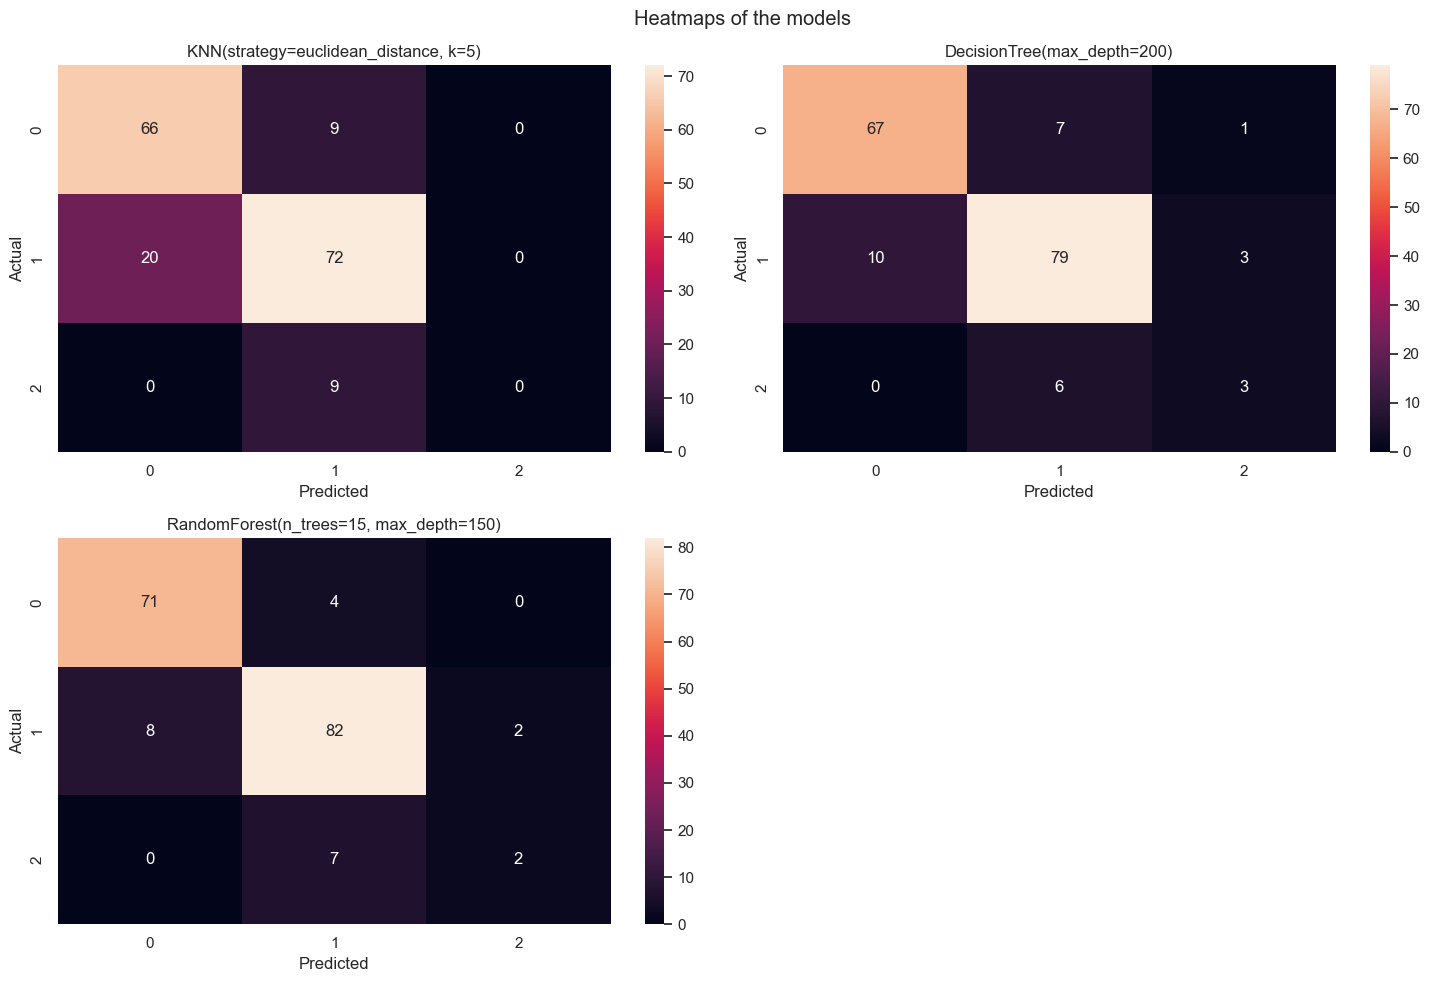

In [20]:
confusion_matrices(x_test=X_test, y_test=Y_test, models=models)

# execution time

In [21]:
fitting_time = []
number_of_executions = 1000
for model in models:
    execution_time = timeit.timeit(lambda: model.fit(X_train, Y_train), number=number_of_executions)
    fitting_time.append({'model': str(model), 'time': execution_time / number_of_executions} )
    
fitting_time = pd.DataFrame(fitting_time)

fitting_time

,model,time
0,"KNN(strategy=euclidean_distance, k=5)",0.000016
1,DecisionTree(max_depth=200),0.309478
2,"RandomForest(n_trees=15, max_depth=150)",2.985276


In [22]:
predictions_time = []
number_of_executions = 1000
for model in models:
    execution_time = timeit.timeit(lambda: model.predict(X_test), number=number_of_executions)
    predictions_time.append({'model': str(model), 'time': execution_time / number_of_executions} )
predictions_time = pd.DataFrame(predictions_time)

predictions_time

,model,time
0,"KNN(strategy=euclidean_distance, k=5)",0.367360
1,DecisionTree(max_depth=200),0.000376
2,"RandomForest(n_trees=15, max_depth=150)",0.059152


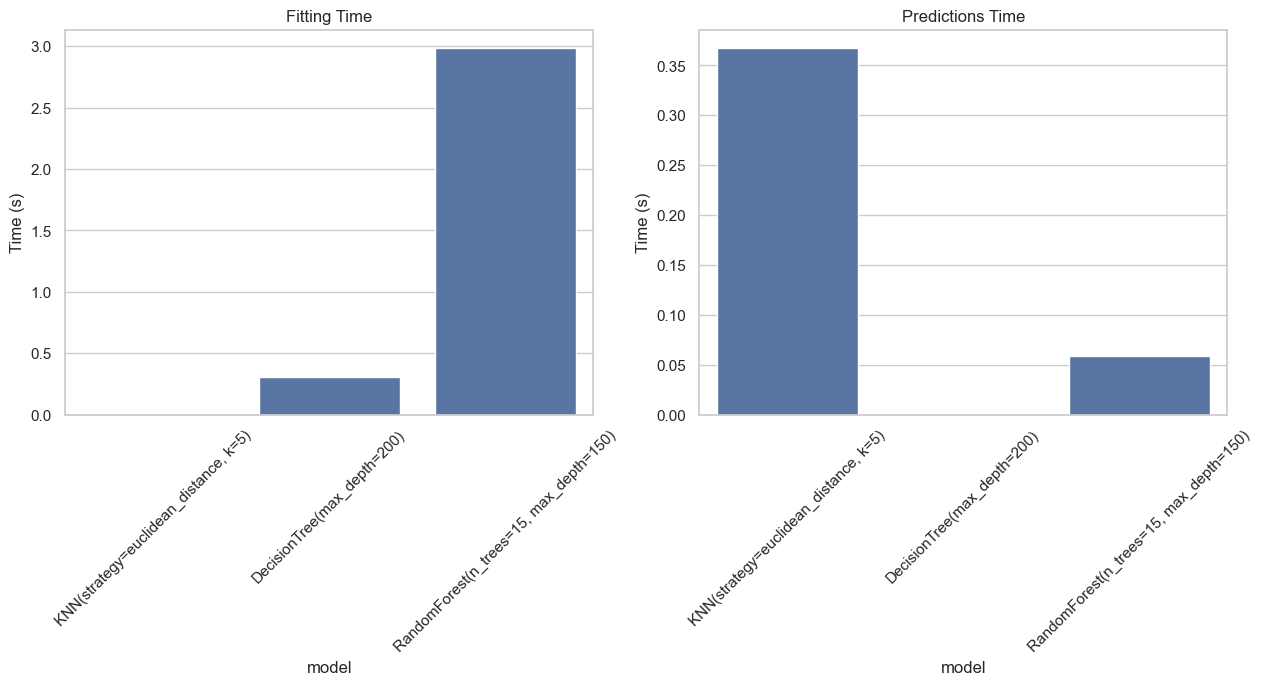

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fitting time
sns.barplot(x='model', y='time', data=fitting_time, ax=ax[0])
ax[0].set_title('Fitting Time')
ax[0].set_ylabel('Time (s)')

# Predictions time
sns.barplot(x='model', y='time', data=predictions_time, ax=ax[1])
ax[1].set_title('Predictions Time')
ax[1].set_ylabel('Time (s)')

# Rotate x-axis labels for better readability
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

# test with examples

In [24]:
num_examples = 5
for i in range(num_examples):
    # get random example
    random_index = np.random.randint(0, X_test.shape[0])
    x = X_test.iloc[random_index]
    y = Y_test.iloc[random_index]
    print(f'Example {i+1}:')
    print(f'Actual class: {y}')
    for model in models:
        print(f'Prediction for {model.__class__.__name__}: {model.predict_single(x)}')

Example 1:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 2:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 3:
Actual class: 1
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 4:
Actual class: 0
Prediction for KNN: 0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 5:
Actual class: 1
Prediction for KNN: 1
Prediction for DecisionTree: 1
Prediction for RandomForest: 1


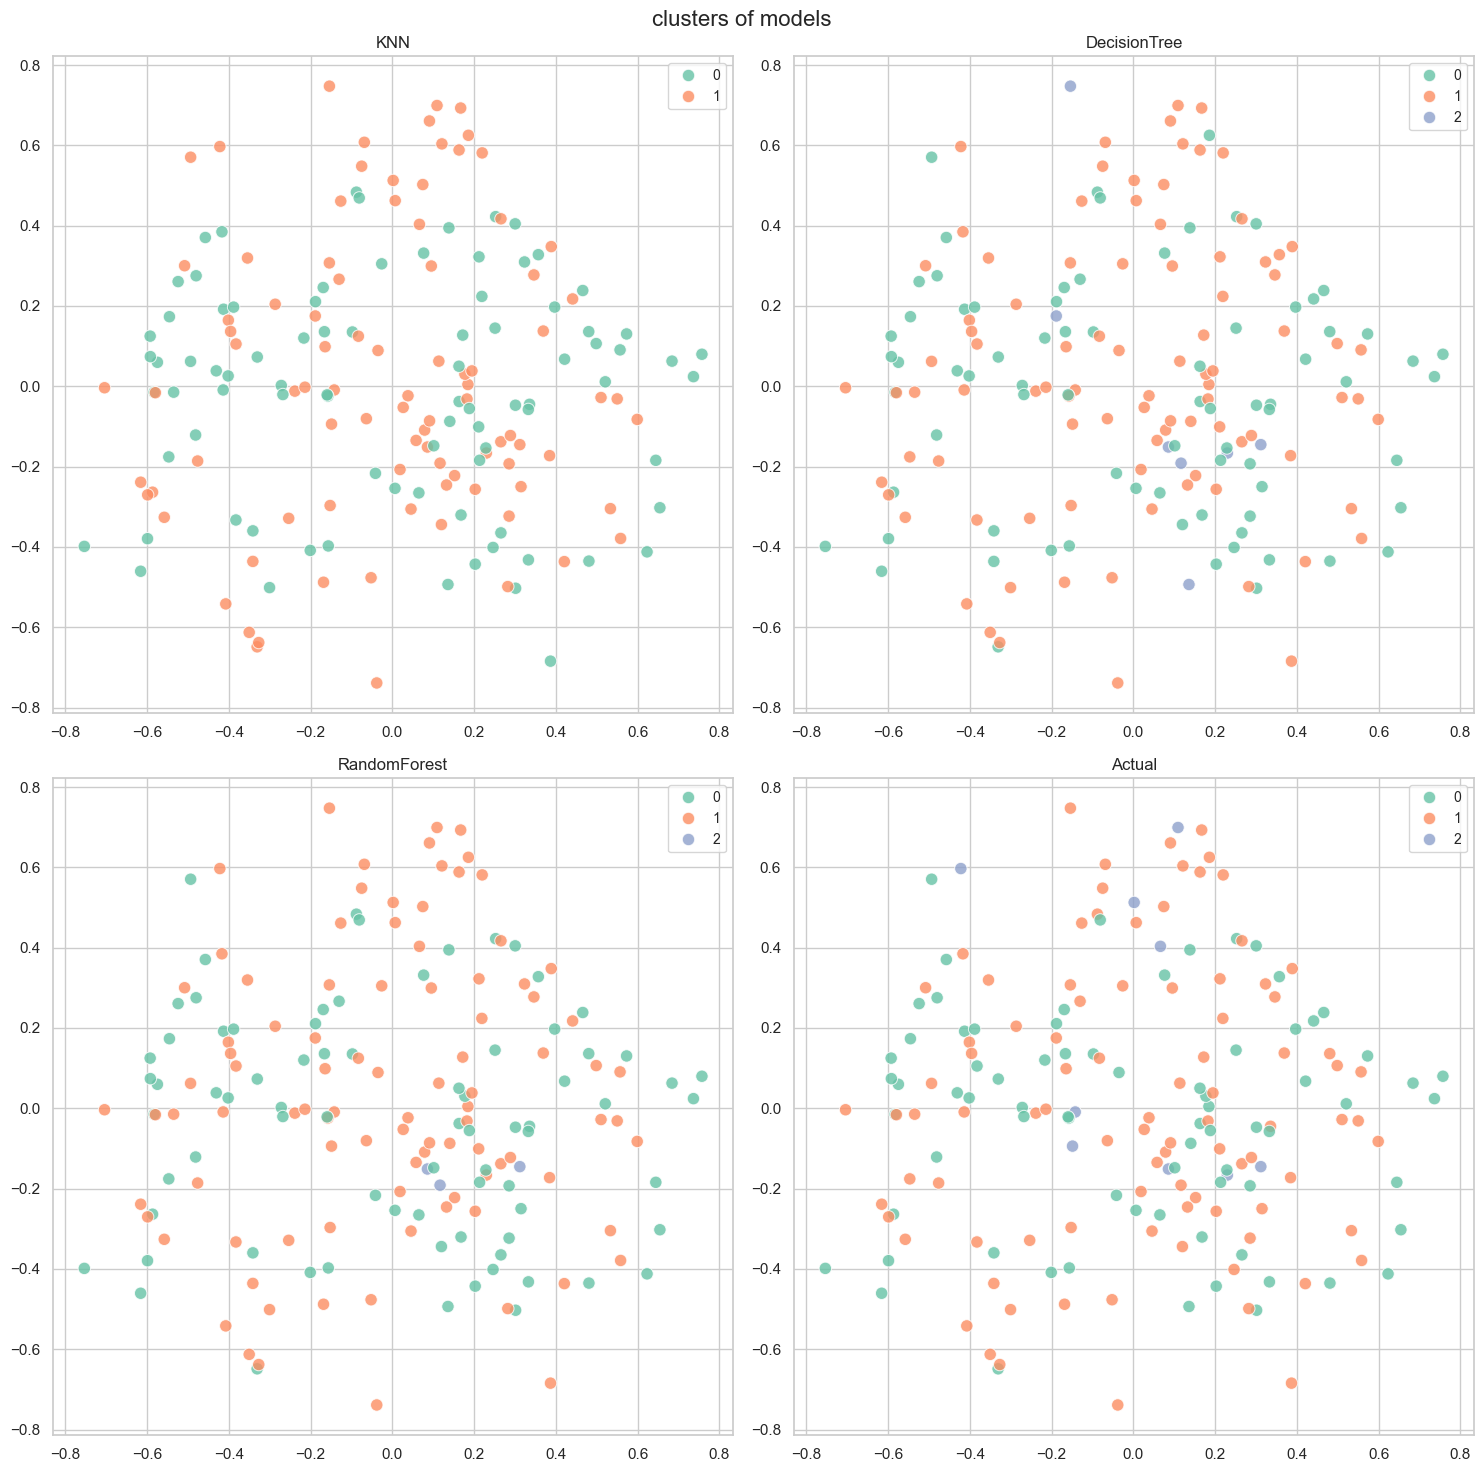

In [25]:
plot_cluster_by_model(X_test, Y_test, "clusters of models", models)